# Fine Tuning BERT Model on a Custom Dataset

- This project looks at fine tuning a pre-trained BERT Model with a custom movie reviews dataset that was downloaded from Kaggle.

- The project was built and run using Google Colab and later saved to the local system.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('/content/reviews.csv')

In [17]:
df.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [6]:
df.shape

(25000, 2)

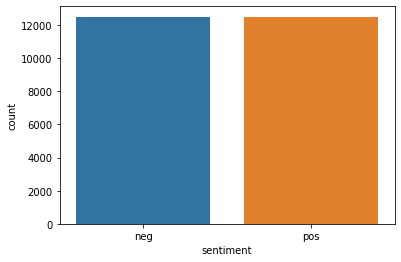

In [7]:
#Checking for the number of positive and negative  reviews
sns.countplot(x=df['sentiment'], data=df)

In [8]:
X = list(df['text'])
y = list(df['sentiment'])

In [9]:
y

['neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',


In [14]:
#Converting the y variable to a dummy variable
y = list(pd.get_dummies(y, drop_first=True)['pos'])

In [15]:
y

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,


In [18]:
# Splitting the dataset into train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [19]:
#Installing the transformers library
!pip install transformers

     |████████████████████████████████| 2.3MB 8.0MB/s 
     |████████████████████████████████| 901kB 38.5MB/s 
     |████████████████████████████████| 3.3MB 49.0MB/s 


## Tokenizing the Text

In [20]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

## Converting to Tensors

In [21]:
train_encodings = tokenizer(X_train, truncation=True, padding=True) #truncation is used to remove whitespaces and padding to get sentences of equal lengths
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [26]:
import tensorflow as tf

In [28]:
train_dataset =  tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train))
test_dataset =  tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test))

In [29]:
train_dataset

<TensorSliceDataset shapes: ({input_ids: (512,), attention_mask: (512,)}, ()), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>

## Building the Model and Training It

In [35]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

In [38]:
training_args = TFTrainingArguments(
    output_dir = './results', #output directory
    num_train_epochs=2, #number of training epochs
    per_device_train_batch_size=8, #batch size per device during training
    per_device_eval_batch_size=16, #batch size for evaluation
    warmup_steps=500, #number of warmup steps for learning rate scheduler
    weight_decay=0.01, #strength of weight decay
    logging_dir = './log', #directory for storing logs
    logging_steps=10
)

In [39]:
with training_args.strategy.scope():
  model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased') 

trainer = TFTrainer(model=model, args=training_args, train_dataset=train_dataset, eval_dataset=test_dataset )

trainer.train()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_transform', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_39', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [40]:
trainer.evaluate(test_dataset)

{'eval_loss': 0.23035261727599446}

In [41]:
trainer.predict(test_dataset)

PredictionOutput(predictions=array([[ 2.5283725, -3.1671877],
       [-2.7531857,  2.7965665],
       [ 2.8518035, -3.5162077],
       ...,
       [-2.8223984,  2.8768997],
       [ 2.809843 , -3.3830342],
       [-2.8203845,  2.879169 ]], dtype=float32), label_ids=array([0, 1, 0, ..., 1, 0, 1], dtype=int32), metrics={'eval_loss': 0.2306235014502682})

In [42]:
output = trainer.predict(test_dataset)[1]

In [43]:
output

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

## Model Evaluation

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, output))
print(confusion_matrix(y_test, output))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3765
           1       1.00      1.00      1.00      3735

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

[[3765    0]
 [   0 3735]]


## Saving the Model

In [46]:
trainer.save_model('reviews_model')